In [2]:
# import libs
import pandas as pd
import numpy as np
import glob
import os
import re
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
# https://regex101.com/r/abScq8/2
# building REGEX to search in the string begining alpha-characters
regex = re.compile('^[a-zA-Z]*')
regex
# print(regex.match(""))

re.compile(r'^[a-zA-Z]*', re.UNICODE)

In [4]:
# reading all files and building a single dataframe
path = 'data/*'
all_files = glob.glob(path + "/*.csv")
li = []

In [5]:
# read data in the files, create data frame objects and add them to the list
for label in all_files:
    df = pd.read_csv(label, index_col=None, header=0)
    full_name = os.path.basename(label)

    # extracting from label only first word in the name
    new_name = regex.match(full_name).group()

    # creating an object dataframe and adding it to the list
    df['label'] = new_name
    li.append(df)

# concatenate dataframes in the list into a single dataframe
df = pd.concat(li, axis=0, ignore_index=True)
df

,accelerometer_X,accelerometer_Y,accelerometer_Z,label
0,1.000776,4.616021,8.576031,idle
1,0.718261,4.209007,8.446744,idle
2,-0.909797,-0.282516,9.203311,idle
3,5.099650,0.148441,8.418014,idle
4,1.762132,-0.162806,9.251195,idle
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


In [7]:
# calculate how many observations of each activity type
labels_count = df['label'].value_counts()
labels_count

running    102240
walking     55500
idle        31170
stairs       4950
Name: label, dtype: int64

In [8]:
# create a dataframe out of activity type statistics for later visualizations
df_labels_count = pd.DataFrame(labels_count, index = labels_count.index)
df_labels_count.rename(inplace= True, columns = {'label':'count'})
df_labels_count['activity_type'] = df_labels_count.index

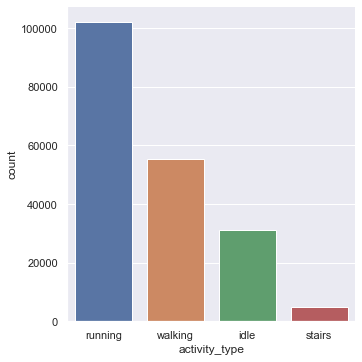

In [10]:
# visualize breakdown by activity types
sns.catplot(x = 'activity_type', y = 'count', kind = 'bar', data = df_labels_count)

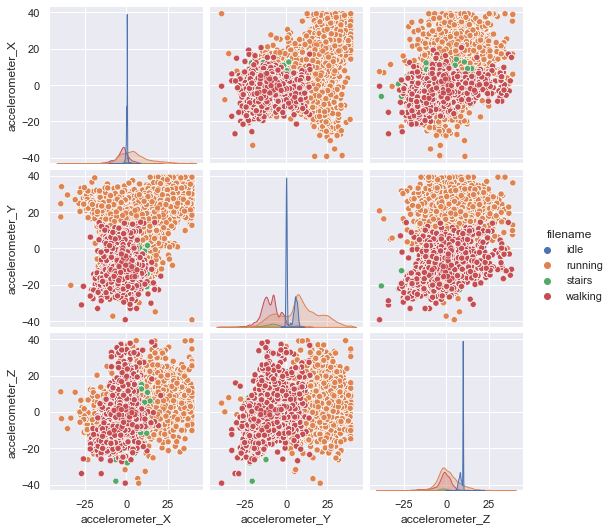

In [9]:
sns.set()
sns.pairplot(df, hue='label')

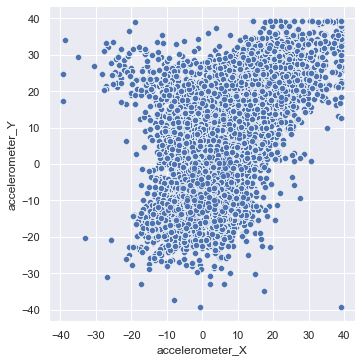

In [10]:
# plot accelerometer_X and accelerometer_Y
sns.relplot(x="accelerometer_X", y="accelerometer_Y", data=df);

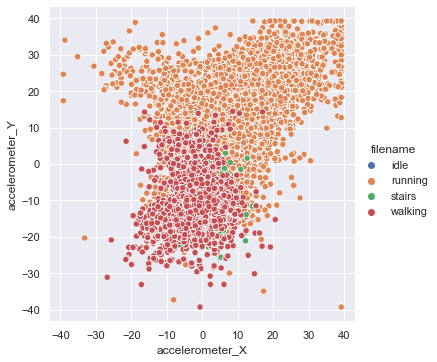

In [11]:
# plot accelerometer_X and accelerometer_Y with label as the third dimension
sns.relplot(x="accelerometer_X", y="accelerometer_Y", hue="label", data=df);


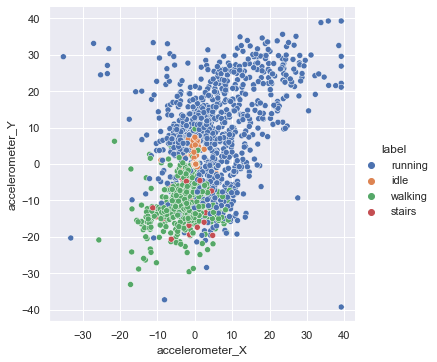

In [11]:
# plot accelerometer_X and accelerometer_Y with label as the third dimension and with reduced dataset to 2000 random
# unique observations
dfsample = df.sample(n = 2000, replace = False)
sns.relplot(x="accelerometer_X", y="accelerometer_Y", hue="label", data=dfsample)

In [12]:
# drop label column 'label'
X_df = df.drop('label', axis= 1)
X_df

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,1.000776,4.616021,8.576031
1,0.718261,4.209007,8.446744
2,-0.909797,-0.282516,9.203311
3,5.099650,0.148441,8.418014
4,1.762132,-0.162806,9.251195
...,...,...,...
193855,5.109226,-15.452178,-1.470040
193856,6.373365,-11.741165,-8.226476
193857,3.289633,-9.993398,-0.383072
193858,-2.978387,-3.050213,1.273715


In [19]:
# create DF with label (targeted value)
Y_df = df['label']
Y_df

0            idle
1            idle
2            idle
3            idle
4            idle
           ...   
193855    walking
193856    walking
193857    walking
193858    walking
193859    walking
Name: label, Length: 193860, dtype: object

In [21]:
df.loc[df['label'] == 'walking']

,accelerometer_X,accelerometer_Y,accelerometer_Z,label
138360,2.322376,3.643975,11.827356,walking
138361,1.781286,4.668694,6.148310,walking
138362,7.963115,-4.113238,1.359907,walking
138363,1.996764,-1.398214,1.163582,walking
138364,5.185841,-12.143391,4.687847,walking
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


In [30]:
df['accelerometer_X'].mean()

1.9235497301660986

In [49]:
df['accelerometer_X']

0         1.000776
1         0.718261
2        -0.909797
3         5.099650
4         1.762132
            ...   
193855    5.109226
193856    6.373365
193857    3.289633
193858   -2.978387
193859   -4.347870
Name: accelerometer_X, Length: 193860, dtype: float64

In [37]:
only_idle = df.where(df['label'] == 'idle')
only_idle.count()

accelerometer_X    31170
accelerometer_Y    31170
accelerometer_Z    31170
filename           31170
dtype: int64

In [36]:
only_running = df.where(df['label'] == 'running')
only_running.count()

accelerometer_X    102240
accelerometer_Y    102240
accelerometer_Z    102240
filename           102240
dtype: int64

In [38]:
only_stairs = df.where(df['label'] == 'stairs')
only_stairs.count()

accelerometer_X    4950
accelerometer_Y    4950
accelerometer_Z    4950
filename           4950
dtype: int64

In [39]:
only_walking = df.where(df['label'] == 'walking')
only_walking.count()

accelerometer_X    55500
accelerometer_Y    55500
accelerometer_Z    55500
filename           55500
dtype: int64

<re.Match object; span=(0, 0), match=''>
